# mBuild Tutorial 09: Surface Functionalization

This tutorial demonstrates the use of the surface functionalization routines included in mBuild. 

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

Here, we will examine the functionalization of surfaces with alkane chains.  Since we will make use of `Polymer` class, we'll need to first define the CH2 moiety, as before.

In [2]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')

mBuild features several functions to aid in the functionalization of surfaces. For example, the `Pattern.apply_to_compound` method allows one to connect copies of a 'guest' `Compound` to `Ports` located on a 'host' `Compound`. We'll explore how this can be useful for surface functionalization by considering a crystalline silica surface (featuring many `Ports`) as our host and a polymer chain as our guest.

First we'll import our crystalline silica surface from mBuild's `surfaces` library.  Note, this structure has surface binding sites already identified, with `Ports` placed at these locations. In the future we hope to add routines to mBuild to automatically detect surface sites and add `Ports` to them.

/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1961: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1963: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


<IPython.core.display.Javascript object>


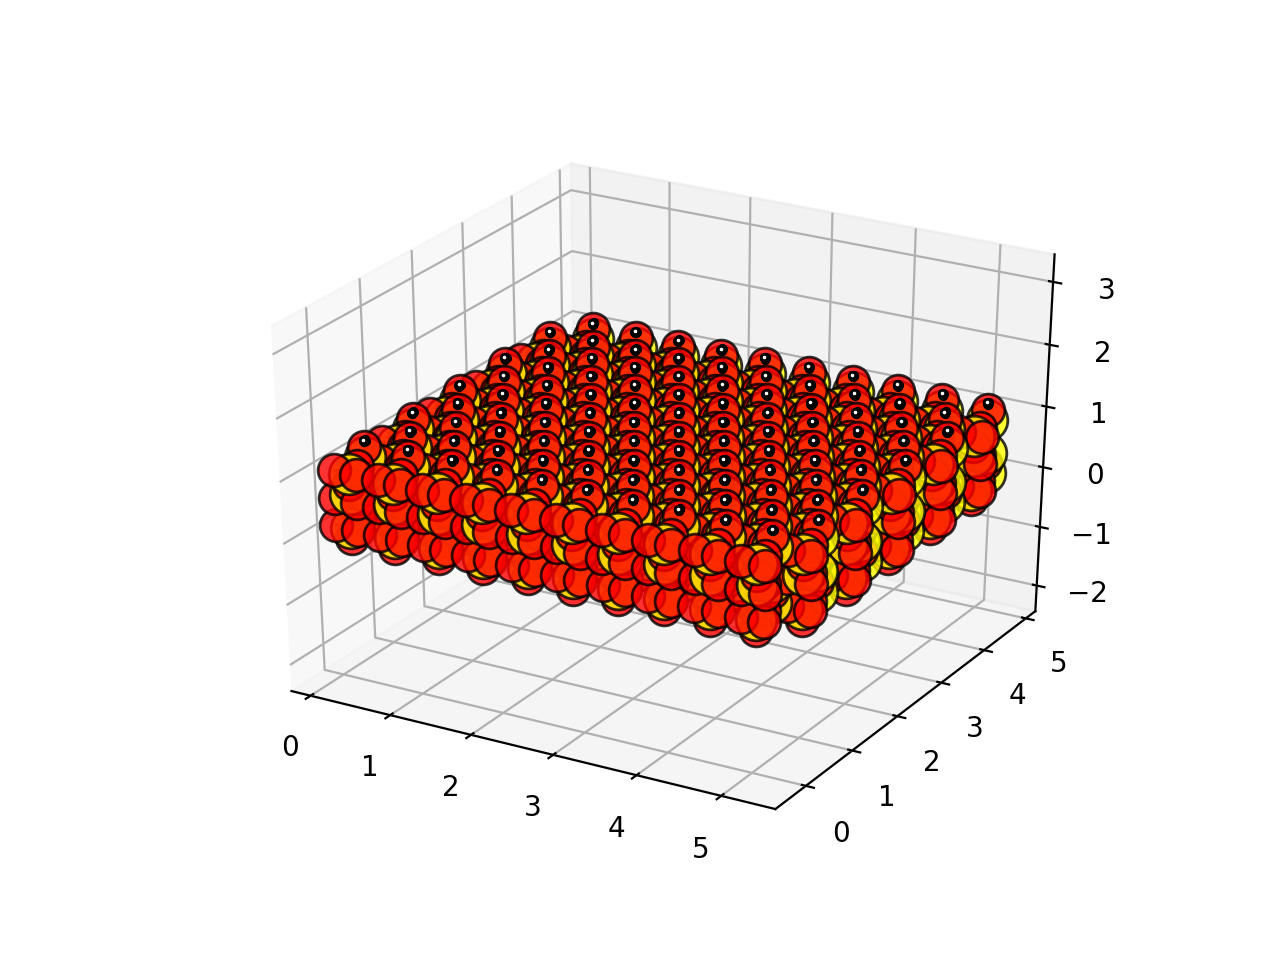

In [3]:
from mbuild.lib.surfaces import Betacristobalite
surface = Betacristobalite()
visualize(surface)

mBuild also features a recipe that creates a silica interface by carving from bulk amorphous silica.

<IPython.core.display.Javascript object>


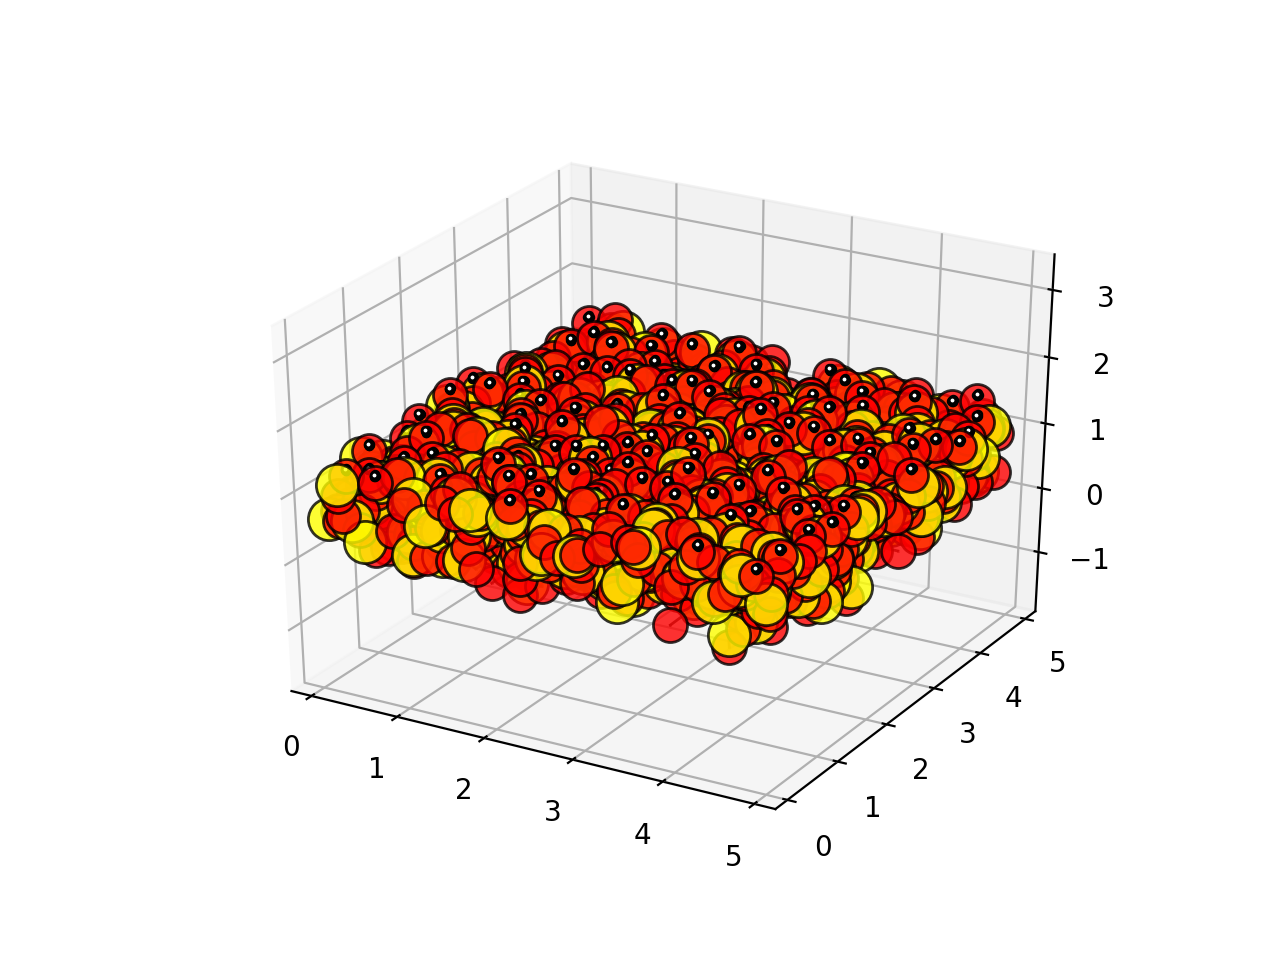

In [4]:
from mbuild.lib.bulk_materials import AmorphousSilica
from mbuild.recipes import SilicaInterface

surface = SilicaInterface(bulk_silica=AmorphousSilica())
visualize(surface)

Now, we will  create the monolayer surface, via the following steps:
- create prototypes for two polymer chains of different lengths
- specify a random pattern of 30 points in 2D space
- use `apply_to_compound` to stick copies of the first polymer on the surface, backfilling unused `Ports` with the shorter polymer 

In the mBuild nomenclature, `guests` are the `Compound` copies that have been added to the surface and `backfills` are an optional second `Compound` type that can be used to fill any leftover `Ports` in the host `Compound` after all points in the `Pattern` have been satisfied.

Note, these chains are uncapped, but could be easily capped following the same procedures in the prior tutorials. 

/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1961: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1963: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


<IPython.core.display.Javascript object>


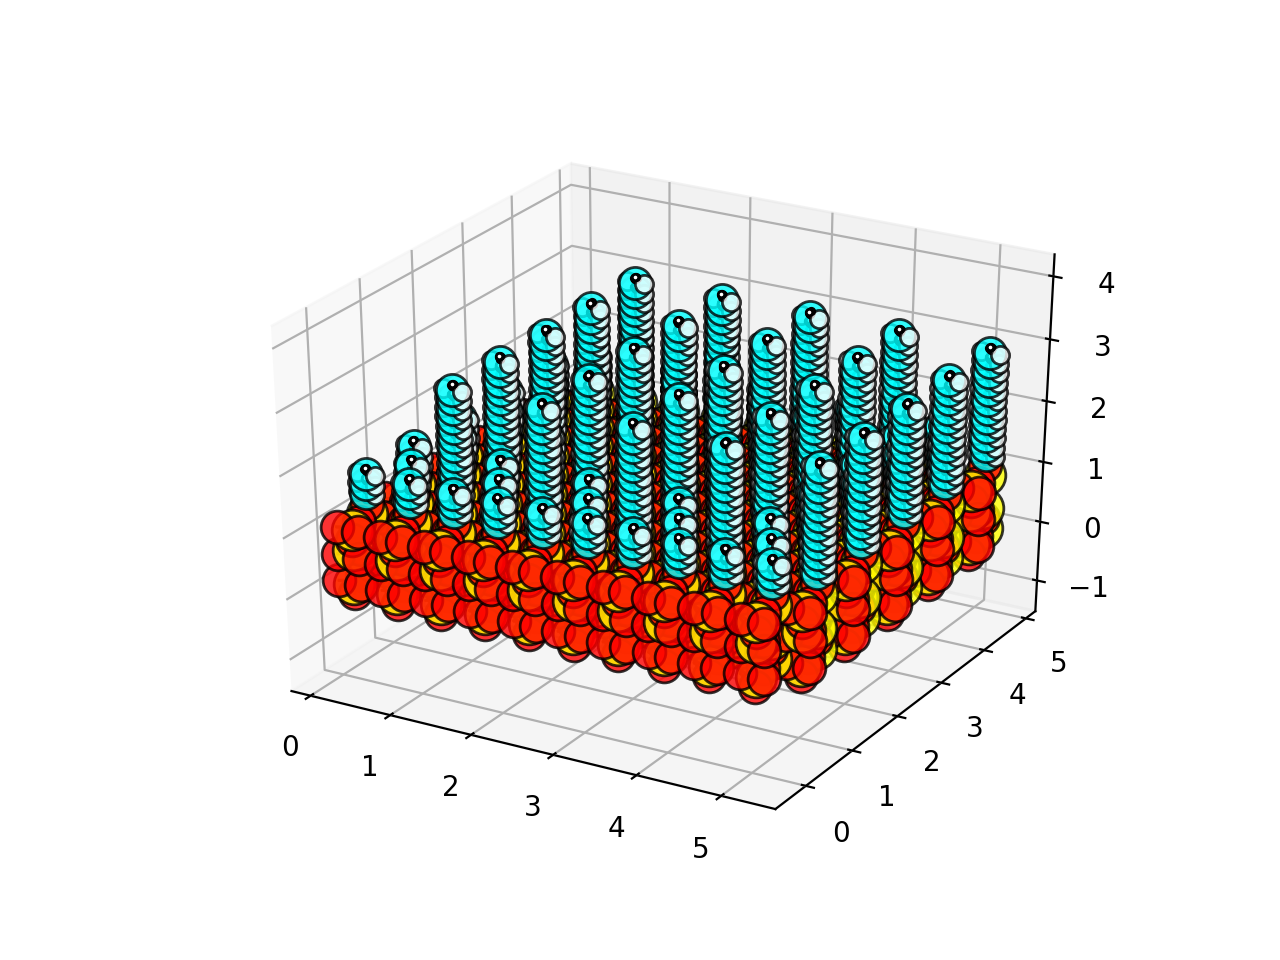

In [7]:
surface = Betacristobalite()

alkane_12 = mb.Polymer(monomers=CH2(), n=12, port_labels=('up', 'down'))
alkane_3 = mb.Polymer(monomers=CH2(), n=3, port_labels=('up', 'down'))
pattern = mb.Grid2DPattern(5, 5)
guests, backfills = pattern.apply_to_compound(guest=alkane_12, host=surface, backfill=alkane_3, backfill_port_name='down')
functionalized_surface = mb.Compound(subcompounds=[surface, guests, backfills])
visualize(functionalized_surface)

As we've seen, the `Pattern.apply_to_compound` method is a useful way to approach surface functionalization with mBuild. However, this can be done even easier by using `mbuild.Monolayer`, where the above steps have been wrapped into a class. Multi-component monolayers can be generated by simply passing a list of `Compounds` to the `chains` argument also with the `fractions` of each component.

/Users/cri/Projects/mbuild/mbuild/recipes/monolayer.py:64: UserWarning: 
 Adding 62 of chain <Polymer 9 particles, non-periodic, 8 bonds, id: 5347111488>
  warn("\n Adding {} of chain {}".format(n_points, chain))
/Users/cri/Projects/mbuild/mbuild/recipes/monolayer.py:64: UserWarning: 
 Adding 50 of chain <Polymer 36 particles, non-periodic, 35 bonds, id: 5346966664>
  warn("\n Adding {} of chain {}".format(n_points, chain))
/Users/cri/Projects/mbuild/mbuild/recipes/monolayer.py:83: UserWarning: 
 Adding 13 of chain <Polymer 54 particles, non-periodic, 53 bonds, id: 5346771296>
  warn("\n Adding {} of chain {}".format(len(pattern), chains[-1]))


<IPython.core.display.Javascript object>


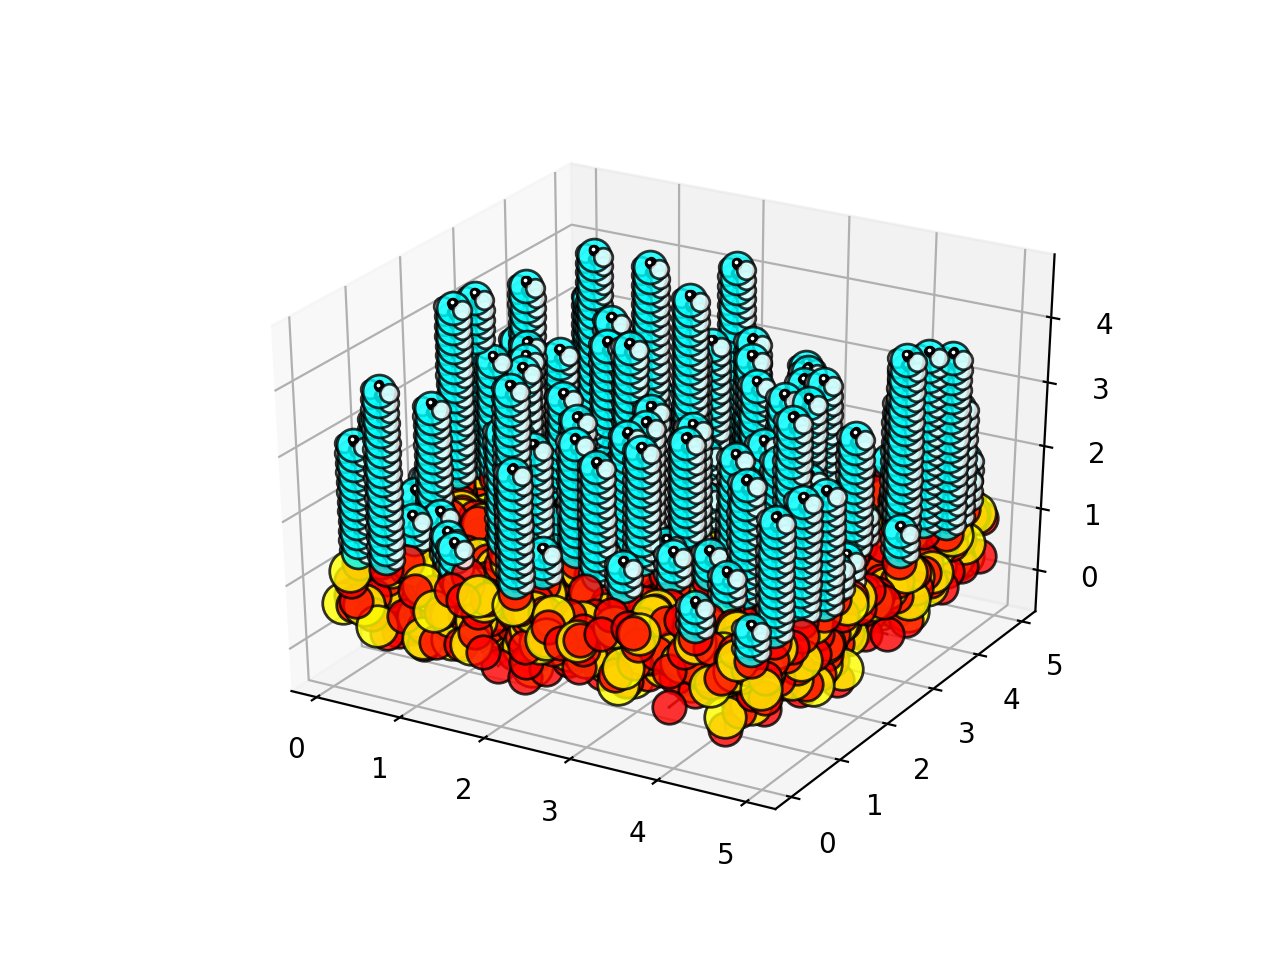

In [8]:
surface = SilicaInterface(bulk_silica=AmorphousSilica())
alkane_18 = mb.Polymer(monomers=CH2(), n=18, port_labels=('up', 'down'))
alkane_12 = mb.Polymer(monomers=CH2(), n=12, port_labels=('up', 'down'))
alkane_3 = mb.Polymer(monomers=CH2(), n=3, port_labels=('up', 'down'))

monolayer = mb.Monolayer(surface=surface, chains=(alkane_3, alkane_12, alkane_18), fractions=(0.5, 0.4, 0.1))
visualize(monolayer)